# Data Processing Pipeline Tests

In [3]:
import glob

import numpy as np
import polars as pl
from astronet.constants import (
    ELASTICC_FILTER_MAP,
    ELASTICC_PB_COLORS,
    ELASTICC_PB_WAVELENGTHS,
)
from astronet.preprocess import generate_gp_all_objects, remap_filters
from astronet.viz.visualise_data import plot_event_gp_mean

transient = "Mdwarf-flare"

queries = []
for file in glob.glob(f"../data/processed/training_alerts_v3/{transient}/*"):
    q = pl.scan_csv(file)
    queries.append(q)

dataframes = pl.collect_all(queries)

pldf = pl.concat(dataframes)

pdf = pldf.to_pandas()

pdf.rename(
    {
        "HOSTGAL_PHOTOZ": "hostgal_photoz",
        "HOSTGAL_PHOTOZ_ERR": "hostgal_photoz_err",
        "FLUXCAL": "flux",
        "FLUXCALERR": "flux_error",
        "MJD": "mjd",
        "candid": "object_id",
        "type": "target",
        "BAND": "passband",
    },
    axis="columns",
    inplace=True,
)

df = pdf.filter(
    items=[
        "mjd",
        "flux",
        "flux_error",
        "hostgal_photoz",
        "hostgal_photoz_err",
        "passband",
        "object_id",
        "target",
    ]
)

df = remap_filters(df, filter_map=ELASTICC_FILTER_MAP)

In [4]:
object_list = list(np.unique(df["object_id"]))
print(f"NUM TOTAL ALERTS FOR {transient}: {len(object_list)}")

obs_transient = df
generated_gp_dataset = generate_gp_all_objects(
    object_list,
    obs_transient,
    timesteps=100,
    pb_wavelengths=ELASTICC_PB_WAVELENGTHS,
)
generated_gp_dataset["object_id"] = generated_gp_dataset["object_id"].astype(int)

print(
    f"NUM PROCESSED ALERTS FOR {transient}: {len(np.unique(generated_gp_dataset['object_id']))}"
)

ddf = df[["hostgal_photoz", "hostgal_photoz_err", "object_id", "target"]]

NUM TOTAL ALERTS FOR Mdwarf-flare: 3308
SKIPPING OBJECT ID:13622874, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622875, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622876, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622877, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622878, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622879, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622880, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13622881
SKIPPING OBJECT ID:13622882, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622883, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13622884
SKIPPING OBJECT ID:13622885, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622886, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13622887, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622888, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622889, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622890, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13622891, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13622892, ONLY 1 FILTER RECORDED
COMPLETED OBJECT I

COMPLETED OBJECT ID:13623041
SKIPPING OBJECT ID:13623042, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623043, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623044, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623045, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623046
SKIPPING OBJECT ID:13623047, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623048, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623049, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623050
SKIPPING OBJECT ID:13623051, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623052
SKIPPING OBJECT ID:13623053, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623054, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13623055, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623056, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623057, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623058, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623059, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623060, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13623061, ONLY 1 FILTER RECORDED


COMPLETED OBJECT ID:13623226
SKIPPING OBJECT ID:13623227, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623228, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623229, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623230, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623231, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623232, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623233, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623234, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623235, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13623236, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623237, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623238, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623239, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623240
SKIPPING OBJECT ID:13623241, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623242, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623243, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13623244, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623245, ONLY 1 FILTER RECORDED
SKIPPI

COMPLETED OBJECT ID:13623407
SKIPPING OBJECT ID:13623408, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623409, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623410, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623411, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623412, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623413
SKIPPING OBJECT ID:13623414, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623415, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623416, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623417, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623418, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623419, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623420, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623421, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13623422, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623423, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623424, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623425, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623426, ONLY 1 FILTER RECORDED
SKIPPI

COMPLETED OBJECT ID:13623576
SKIPPING OBJECT ID:13623577, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623578, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623579, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623580
SKIPPING OBJECT ID:13623581, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623582, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623583, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623584, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623585, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13623586, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623587, ONLY 3 FILTER RECORDED
SKIPPING OBJECT ID:13623588, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623589, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623590, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623591, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623592, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623593, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623594, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623595, ONLY 1 FILTER RECORDED
COMPLE

COMPLETED OBJECT ID:13623765
SKIPPING OBJECT ID:13623766, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623767
SKIPPING OBJECT ID:13623768, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623769, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623770, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623771, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623772, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623773
SKIPPING OBJECT ID:13623774, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623775, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623776, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623777
SKIPPING OBJECT ID:13623778, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623779
SKIPPING OBJECT ID:13623780, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623781, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13623782, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623783, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623784
SKIPPING OBJECT ID:13623785, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623786, ONLY 1 FILTER REC

COMPLETED OBJECT ID:13623946
SKIPPING OBJECT ID:13623947, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623948, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623949, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623950, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13623951, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623952, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623953, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623954, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623955, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13623956, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13623957
SKIPPING OBJECT ID:13623958, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623959, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623960, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623961, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623962, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623963, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623964, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13623965, ONLY 1 FILTER RECORDED
SKIPPI

COMPLETED OBJECT ID:13624112
SKIPPING OBJECT ID:13624113, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624114, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13624115, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624116, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624117, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624118, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624119, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624120
SKIPPING OBJECT ID:13624121, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624122, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624123
SKIPPING OBJECT ID:13624124, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624125, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13624126, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624127, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624128, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13624129, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624130, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13624131, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624132, 

COMPLETED OBJECT ID:13624280
COMPLETED OBJECT ID:13624281
COMPLETED OBJECT ID:13624282
SKIPPING OBJECT ID:13624283, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624284, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624285
SKIPPING OBJECT ID:13624286, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624287, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624288, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624289, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624290, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624291, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624292, ONLY 2 FILTER RECORDED
SKIPPING OBJECT ID:13624293, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624294, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624295, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624296, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624297, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624298, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624299
SKIPPING OBJECT ID:13624300, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:1362

COMPLETED OBJECT ID:13624460
SKIPPING OBJECT ID:13624461, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624462, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624463, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624464, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624465, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624466, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624467, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624468, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624469, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624470
SKIPPING OBJECT ID:13624471, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624472, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624473, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624474, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624475, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624476, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624477, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13624478, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624479, ONLY 4 FILTER RECORDED
SKIPPI

COMPLETED OBJECT ID:13624630
COMPLETED OBJECT ID:13624631
SKIPPING OBJECT ID:13624632, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624633, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624634, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624635, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624636, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624637, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624638, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624639, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624640, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624641
SKIPPING OBJECT ID:13624642, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624643, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624644, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624645, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624646, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624647, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624648, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624649, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624650, 

COMPLETED OBJECT ID:13624798
COMPLETED OBJECT ID:13624799
COMPLETED OBJECT ID:13624800
SKIPPING OBJECT ID:13624801, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624802, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13624803, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624804
SKIPPING OBJECT ID:13624805, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624806, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624807, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624808, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624809, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624810
SKIPPING OBJECT ID:13624811, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624812, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624813, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13624814, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624815, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624816, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13624817, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624818, ONLY 2 FILTER RECORDED
SKIPPING OBJECT ID:1362

COMPLETED OBJECT ID:13624964
COMPLETED OBJECT ID:13624965
SKIPPING OBJECT ID:13624966, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624967, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624968, ONLY 3 FILTER RECORDED
SKIPPING OBJECT ID:13624969, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624970, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624971, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624972, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624973, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624974, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624975, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13624976, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624977, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624978, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624979, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624980, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624981, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13624982
SKIPPING OBJECT ID:13624983, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13624984, 

COMPLETED OBJECT ID:13625210
SKIPPING OBJECT ID:13625211, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625212, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625213, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625214, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625215, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625216, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625217, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625218, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625219, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625220, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625221, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625222, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13625223, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625224, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625225, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625226, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625227, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13625228, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625229, ONLY 1

COMPLETED OBJECT ID:13625377
SKIPPING OBJECT ID:13625378, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625379, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625380, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625381, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625382
SKIPPING OBJECT ID:13625383, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625384, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625385, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625386, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625387
SKIPPING OBJECT ID:13625388, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625389, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625390, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625391, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625392, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625393, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625394
SKIPPING OBJECT ID:13625395, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625396, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625397
SKIPPING OBJECT ID:1362

COMPLETED OBJECT ID:13625558
SKIPPING OBJECT ID:13625559, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625560, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625561, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625562, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625563, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13625564, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625565, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:13625566, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625567, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625568
SKIPPING OBJECT ID:13625569, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625570, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625571, ONLY 3 FILTER RECORDED
SKIPPING OBJECT ID:13625572, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625573, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625574, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625575, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625576, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625577
SKIPPING OBJECT ID:13625578, 

COMPLETED OBJECT ID:13625736
SKIPPING OBJECT ID:13625737, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625738, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625739, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625740, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625741, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625742, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625743, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625744
SKIPPING OBJECT ID:13625745, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625746
SKIPPING OBJECT ID:13625747, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625748, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625749, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625750, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625751, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625752, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625753, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625754, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625755, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625756, 

COMPLETED OBJECT ID:13625913
SKIPPING OBJECT ID:13625914, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625915, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625916, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625917, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625918, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13625919, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625920, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13625921
SKIPPING OBJECT ID:13625922, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625923, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625924, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:13625925, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625926, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625927, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625928, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625929, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625930, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625931, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13625932, ONLY 1 FILTER RECORDED
SKIPPI

COMPLETED OBJECT ID:13626080
SKIPPING OBJECT ID:13626081, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626082, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626083, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626084, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626085, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626086, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626087, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13626088
SKIPPING OBJECT ID:13626089, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626090, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626091, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626092, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13626093
SKIPPING OBJECT ID:13626094, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13626095
SKIPPING OBJECT ID:13626096, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626097, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:13626098
SKIPPING OBJECT ID:13626099, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:13626100, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:1362

In [5]:
ddf

,hostgal_photoz,hostgal_photoz_err,object_id,target
0,-9.0,-9.0,13623097,Mdwarf-flare
1,-9.0,-9.0,13623098,Mdwarf-flare
2,-9.0,-9.0,13623099,Mdwarf-flare
3,-9.0,-9.0,13623100,Mdwarf-flare
4,-9.0,-9.0,13623100,Mdwarf-flare
...,...,...,...,...
245560,-9.0,-9.0,13622946,Mdwarf-flare
245561,-9.0,-9.0,13622946,Mdwarf-flare
245562,-9.0,-9.0,13622947,Mdwarf-flare
245563,-9.0,-9.0,13622948,Mdwarf-flare


In [6]:
generated_gp_dataset

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,61033.0595,11.03708,-40.265685,-8.701392,-3.213859,-14.477411,-43.43757,13622881
1,61033.352682,12.416537,-39.502918,-7.750693,-0.981393,-12.100611,-42.466704,13622881
2,61033.645864,13.662312,-38.581701,-6.805532,1.440326,-9.51724,-41.303991,13622881
3,61033.939045,14.813302,-37.485695,-5.862135,4.01976,-6.720877,-39.927636,13622881
4,61034.232227,15.901959,-36.199111,-4.916034,6.731453,-3.707492,-38.313381,13622881
...,...,...,...,...,...,...,...,...
35295,61093.215428,20.897085,90.359249,6.136141,305.201331,86.376652,94.119596,13626178
35296,61093.499121,24.30881,95.538568,7.103679,323.779079,91.246629,100.591025,13626178
35297,61093.782814,28.452353,100.145367,8.335974,341.376941,95.986301,106.686722,13626178
35298,61094.066507,33.490808,104.242944,9.860821,357.760398,100.581288,112.399845,13626178


In [7]:
dfwz = generated_gp_dataset.merge(ddf, on="object_id", how="left").drop_duplicates()
dfwz

,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id,hostgal_photoz,hostgal_photoz_err,target
0,61033.0595,11.03708,-40.265685,-8.701392,-3.213859,-14.477411,-43.43757,13622881,-9.0,-9.0,Mdwarf-flare
456,61033.352682,12.416537,-39.502918,-7.750693,-0.981393,-12.100611,-42.466704,13622881,-9.0,-9.0,Mdwarf-flare
912,61033.645864,13.662312,-38.581701,-6.805532,1.440326,-9.51724,-41.303991,13622881,-9.0,-9.0,Mdwarf-flare
1368,61033.939045,14.813302,-37.485695,-5.862135,4.01976,-6.720877,-39.927636,13622881,-9.0,-9.0,Mdwarf-flare
1824,61034.232227,15.901959,-36.199111,-4.916034,6.731453,-3.707492,-38.313381,13622881,-9.0,-9.0,Mdwarf-flare
...,...,...,...,...,...,...,...,...,...,...,...
12149710,61093.215428,20.897085,90.359249,6.136141,305.201331,86.376652,94.119596,13626178,-9.0,-9.0,Mdwarf-flare
12149848,61093.499121,24.30881,95.538568,7.103679,323.779079,91.246629,100.591025,13626178,-9.0,-9.0,Mdwarf-flare
12149986,61093.782814,28.452353,100.145367,8.335974,341.376941,95.986301,106.686722,13626178,-9.0,-9.0,Mdwarf-flare
12150124,61094.066507,33.490808,104.242944,9.860821,357.760398,100.581288,112.399845,13626178,-9.0,-9.0,Mdwarf-flare


In [12]:
dfwz.to_csv(f"../data/processed/t2/{transient}.xz", compression="infer", index=False)

/Users/tallamjr/mambaforge/envs/elasticc/lib/python3.10/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot:xlabel='mjd'>)

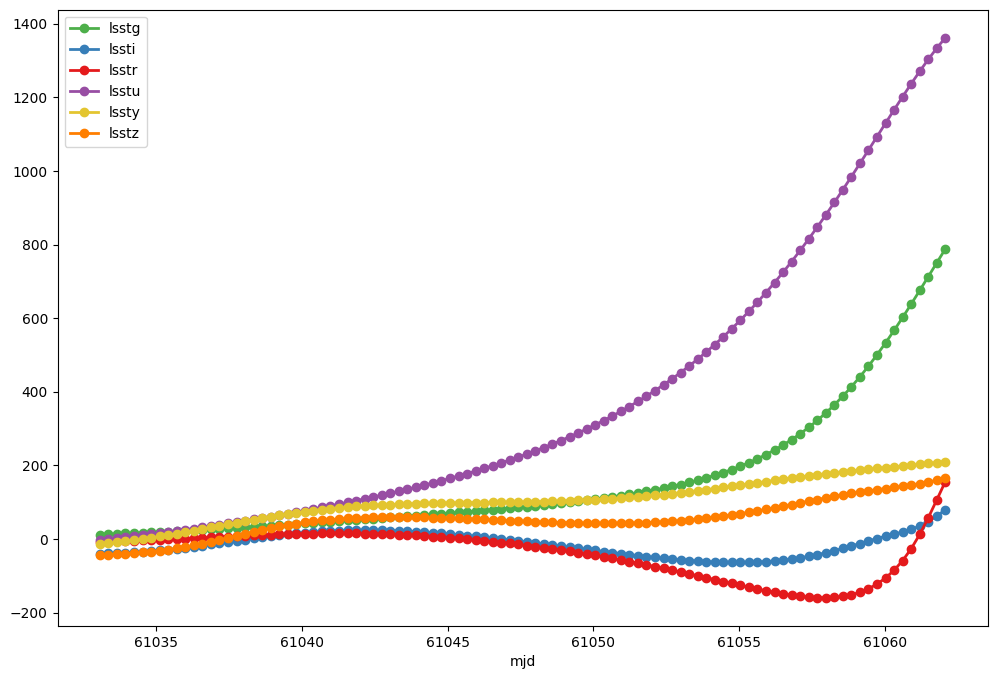

In [27]:
plot_event_gp_mean(
    dfwz.filter(items=[
        "mjd",
        "lsstg", 
        "lssti", 
        "lsstr", 
        "lsstu", 
        "lssty", 
        "lsstz",
        "object_id",
    ]),
    object_id=dfwz["object_id"][0],
    pb_colors=ELASTICC_PB_COLORS,
)

In [24]:
import pandas as pd
df = pd.read_csv(f"../data/processed/t2/{transient}.xz")
df

,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id,hostgal_photoz,hostgal_photoz_err,target
0,61033.059500,11.037080,-40.265685,-8.701392,-3.213859,-14.477411,-43.437570,13622881,-9.0,-9.0,Mdwarf-flare
1,61033.352682,12.416537,-39.502918,-7.750693,-0.981393,-12.100611,-42.466704,13622881,-9.0,-9.0,Mdwarf-flare
2,61033.645864,13.662312,-38.581701,-6.805532,1.440326,-9.517240,-41.303991,13622881,-9.0,-9.0,Mdwarf-flare
3,61033.939045,14.813302,-37.485695,-5.862135,4.019760,-6.720877,-39.927636,13622881,-9.0,-9.0,Mdwarf-flare
4,61034.232227,15.901959,-36.199111,-4.916034,6.731453,-3.707492,-38.313381,13622881,-9.0,-9.0,Mdwarf-flare
...,...,...,...,...,...,...,...,...,...,...,...
35295,61093.215428,20.897085,90.359249,6.136141,305.201331,86.376652,94.119596,13626178,-9.0,-9.0,Mdwarf-flare
35296,61093.499121,24.308810,95.538568,7.103679,323.779079,91.246629,100.591025,13626178,-9.0,-9.0,Mdwarf-flare
35297,61093.782814,28.452353,100.145367,8.335974,341.376941,95.986301,106.686722,13626178,-9.0,-9.0,Mdwarf-flare
35298,61094.066507,33.490808,104.242944,9.860821,357.760398,100.581288,112.399845,13626178,-9.0,-9.0,Mdwarf-flare


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot:xlabel='mjd'>)

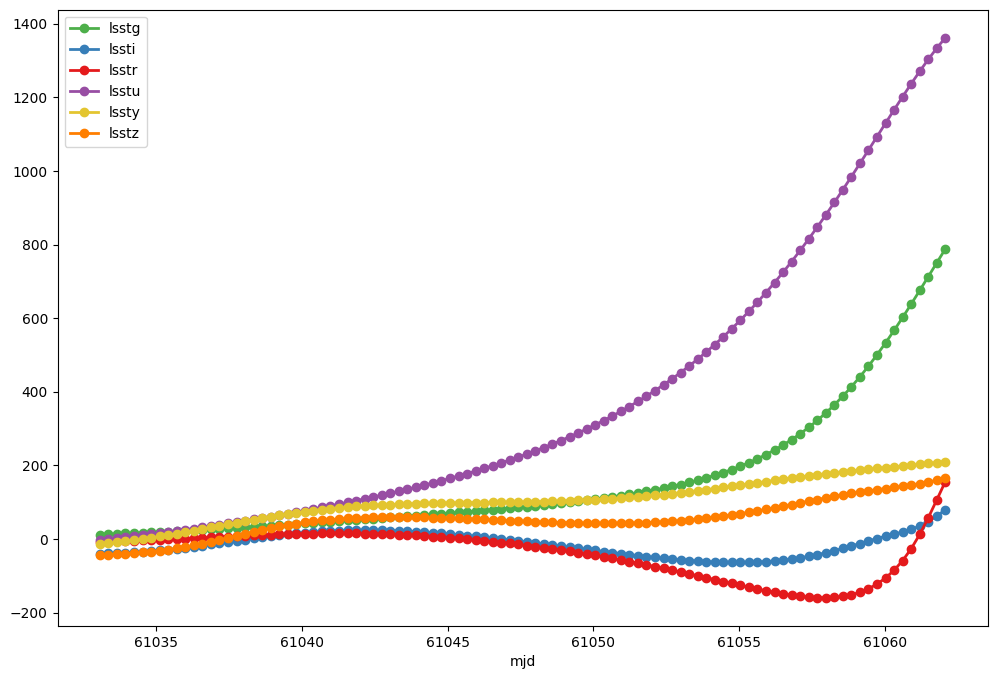

In [26]:
plot_event_gp_mean(
    df.filter(items=[
        "mjd",
        "lsstg", 
        "lssti", 
        "lsstr", 
        "lsstu", 
        "lssty", 
        "lsstz",
        "object_id",
    ]),
    object_id=df["object_id"][0],
    pb_colors=ELASTICC_PB_COLORS,
)